Bernardo Camarena Herrera

Analisis exploratorio de BIG DATA

https://www.kaggle.com/datasets/manjeetsingh/retaildataset?select=stores+data-set.csv

Tenemos 3 "Data sets" de información sobre tiendas. Features, Stores y Sales. A continuación se hará un analisis de estos datos para poder tomar decisiones sobre estas tiendas. 

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt  
plt.rcParams.update({"font.size":15, "figure.figsize": (20,10)} )
import calendar

In [ ]:
features = pd.read_csv("Features data set.csv")
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")

In [ ]:
sales.sort_values(by = "Weekly_Sales", ascending = False)

,Store,Dept,Date,Weekly_Sales,IsHoliday
95373,10,72,26/11/2010,693099.36,True
338013,35,72,25/11/2011,649770.18,True
95425,10,72,25/11/2011,630999.19,True
337961,35,72,26/11/2010,627962.93,True
135665,14,72,26/11/2010,474330.10,True
...,...,...,...,...,...
271300,28,32,25/03/2011,-1321.48,False
153916,16,47,09/03/2012,-1699.00,False
417801,45,47,26/02/2010,-1750.00,False
336495,35,47,02/09/2011,-3924.00,False


En las próximas celdas, utilizamos las funciones (.head, .info,   .describe, .type, .shape) para darnos una idea del formato y la estructura que tienen nuestros datos en las 3 bases de datos distintas. 

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales

,Dept,Weekly_Sales,IsHoliday,key
0,1,24924.50,False,105/02/2010
1,1,46039.49,True,112/02/2010
2,1,41595.55,False,119/02/2010
3,1,19403.54,False,126/02/2010
4,1,21827.90,False,105/03/2010
...,...,...,...,...
421565,98,508.37,False,4528/09/2012
421566,98,628.10,False,4505/10/2012
421567,98,1061.02,False,4512/10/2012
421568,98,760.01,False,4519/10/2012


In [ ]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
features.shape

(8190, 12)

In [ ]:
sales.shape

(421570, 5)

In [ ]:
stores.shape

(45, 3)

In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
sales.describe()


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
stores.describe()


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Vamos a unir la dataframe sales con el dataframe de features, en un dataframe mayor (fs), uniendo el numero de tienda (store) y la fecha (date) y los usaremos como foreign key y primary key respectivamente. 

Luego crearemos un dataframe "maestro" (df), donde uniremos el datframe que creamos anteriormente (fs), con el dataframe de stores, usando de key el numero de tienda (store). 

In [ ]:
features["key"] = features["Store"].apply(str) + features["Date"].apply(str).replace("/"," ")
features = features.drop("IsHoliday", axis = 1)
sales["key"] = sales["Store"].apply(str) + sales["Date"].apply(str).replace("/"," ")
sales = sales.drop("Store", axis = 1)
sales = sales.drop("Date", axis = 1)
fs = pd.merge(features,sales, left_on = "key", right_on="key")
fs
df = pd.merge(fs, stores, left_on= "Store", right_on = "Store")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,key,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,1,24924.50,False,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,2,50605.27,False,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,3,13740.12,False,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,4,39954.04,False,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,93,2487.80,False,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,94,5203.31,False,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,95,56017.47,False,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,97,6817.48,False,B,118221


Aqui abajo creamos un nuevo dataframe "top", donde se muestran las 10 tiendas con más ventas semanales. 

In [ ]:
top = df.groupby(by = "Store").sum().sort_values(by = "Weekly_Sales", ascending = False).head(10)

top["Store"] = top.index
top

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Size,Store
Store,,,,,,,,,,,,,,
20,565360.38,34918.832,41160448.47,18744536.26,9933491.58,19864271.82,22124915.29,2.135215e+06,75285.835,450413,3.013978e+08,723,2081020788,20
4,638680.78,33037.189,34440267.52,14186418.01,7054847.27,18897288.62,25044270.57,1.321802e+06,61281.203,457340,2.995440e+08,727,2114624736,4
14,580229.57,34313.731,41580393.54,15687272.44,7436570.83,15168166.11,20801127.74,1.870330e+06,86838.085,442053,2.889999e+08,703,2017015920,14
13,561438.31,34402.701,41546804.39,19338945.99,10718413.45,18763073.04,27129956.69,1.347734e+06,73369.376,467392,2.865177e+08,739,2300320828,13
2,697263.44,32965.318,39058007.29,16088974.79,6226127.85,17427365.75,23984630.72,2.207844e+06,78047.128,455425,2.753824e+08,722,2071219066,2
10,744204.88,36850.231,35467714.88,15189969.53,11403792.73,15865865.26,19748423.70,1.327171e+06,86346.917,454210,2.716177e+08,724,1304971280,10
27,586001.25,36603.753,45513814.57,15381274.44,6773804.39,21658357.07,20860638.17,1.421450e+06,81815.258,454685,2.538559e+08,719,2087781400,27
6,711093.38,32889.398,30781300.32,12819197.58,6812203.29,13598176.50,20557473.78,2.221556e+06,67456.037,453812,2.237561e+08,721,2067778555,6
1,698891.40,32973.495,29573172.77,8946002.16,4468507.74,13732804.50,18386470.50,2.212658e+06,77966.246,454749,2.224028e+08,723,1550070860,1


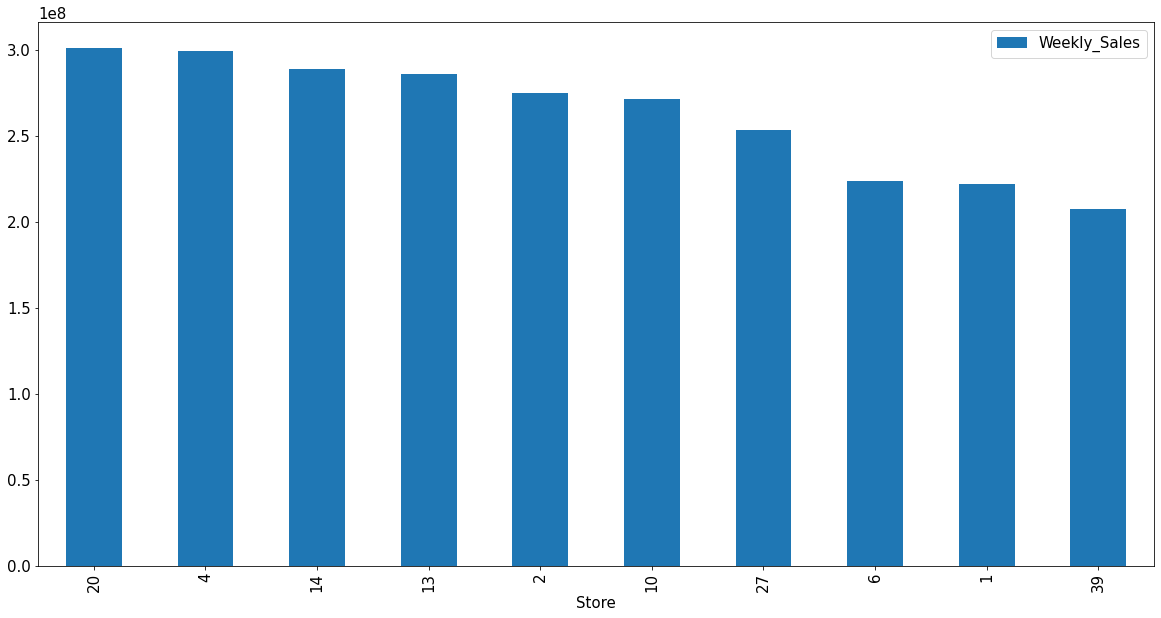

In [ ]:
top.plot(x='Store', y='Weekly_Sales', kind='bar')

In [ ]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,key,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,1,24924.50,False,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,2,50605.27,False,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,3,13740.12,False,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,4,39954.04,False,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,93,2487.80,False,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,94,5203.31,False,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,95,56017.47,False,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,97,6817.48,False,B,118221


A continuación creamos un "boxplot", que muetsra las ventas semnales de cada tienda.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


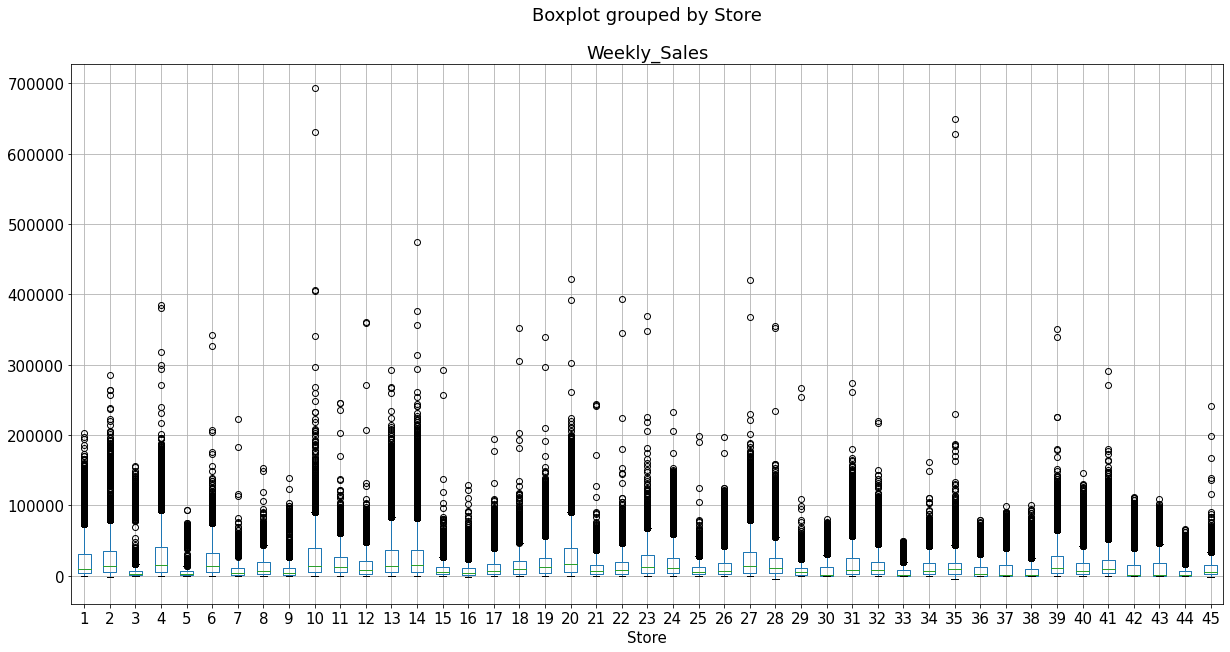

In [ ]:
df.boxplot(column = "Weekly_Sales", by = "Store")

En las siguientes celdas, veremos distintas gráficas (scatterplots), donde reflejamos el impacto que tienen ciertas características (feautures), sobre las ventas. Por ejemplo, la temperatura, el costo de la energía, etc. 

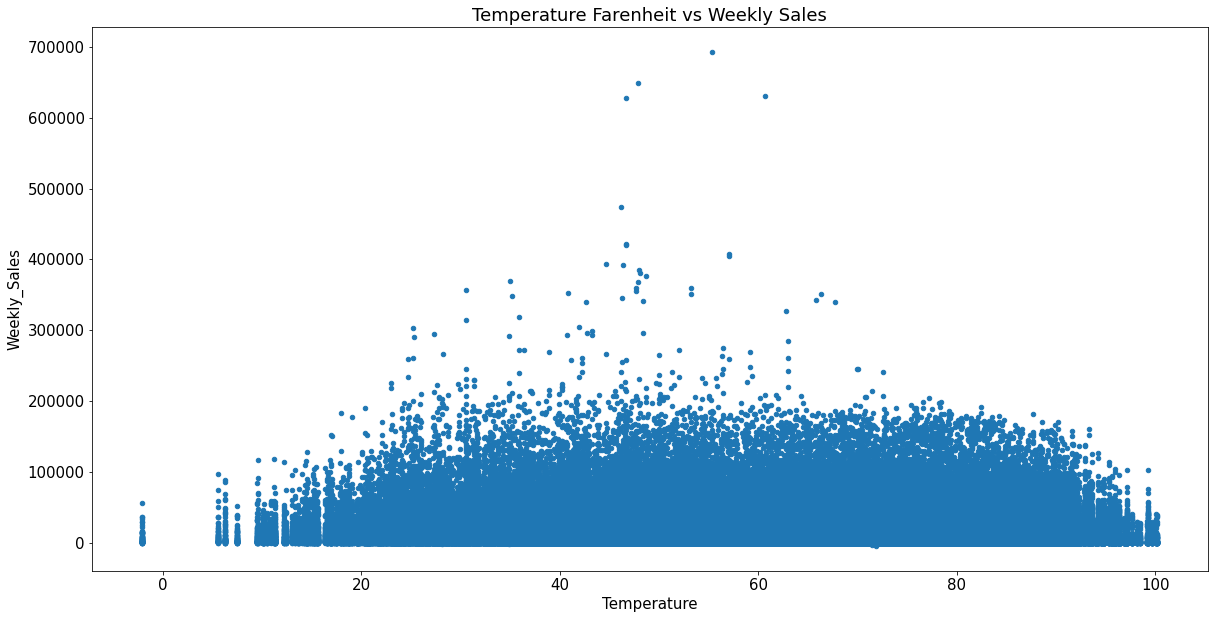

In [ ]:
df.plot(kind = "scatter", x = "Temperature", y = "Weekly_Sales", title = "Temperature Farenheit vs Weekly Sales")

In [ ]:
df 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,key,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,1,24924.50,False,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,2,50605.27,False,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,3,13740.12,False,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,4,39954.04,False,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,93,2487.80,False,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,94,5203.31,False,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,95,56017.47,False,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,97,6817.48,False,B,118221


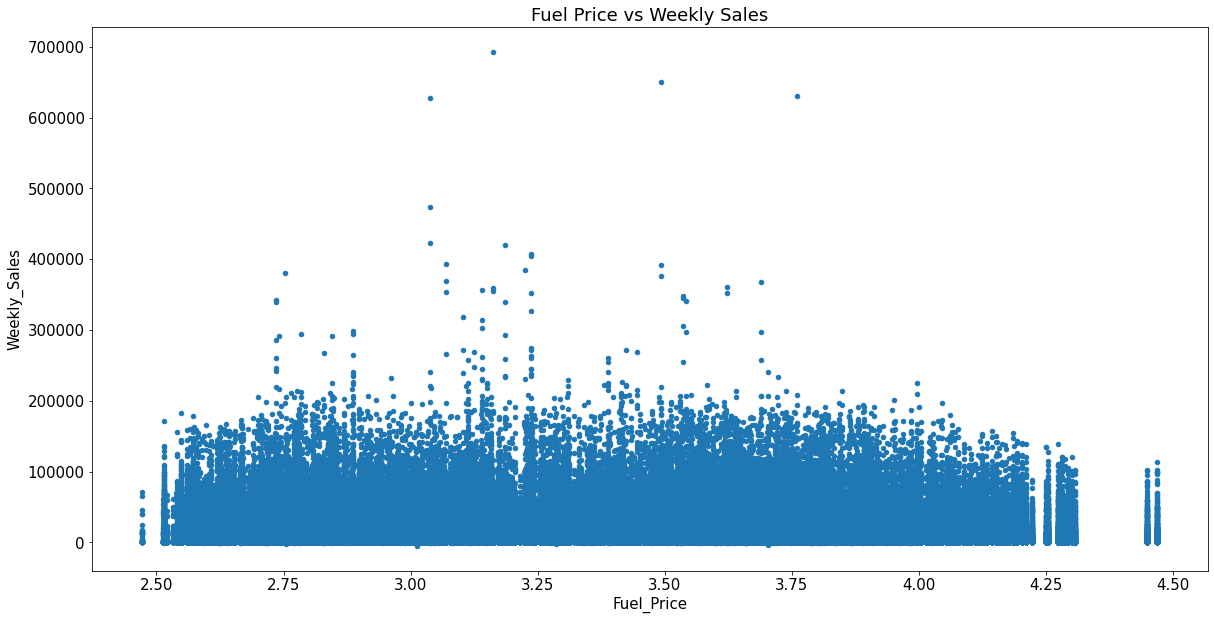

In [ ]:
df.plot(kind = "scatter", x = "Fuel_Price", y = "Weekly_Sales", title = "Fuel Price vs Weekly Sales")

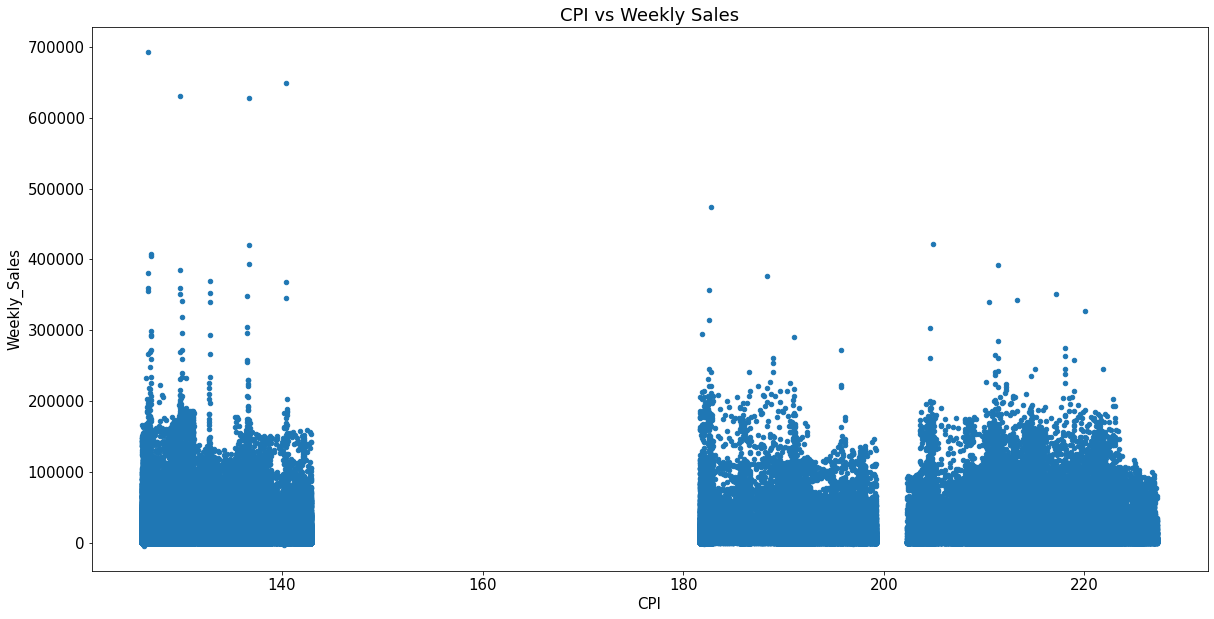

In [ ]:
df.plot(kind = "scatter", x = "CPI", y = "Weekly_Sales", title = "CPI vs Weekly Sales")

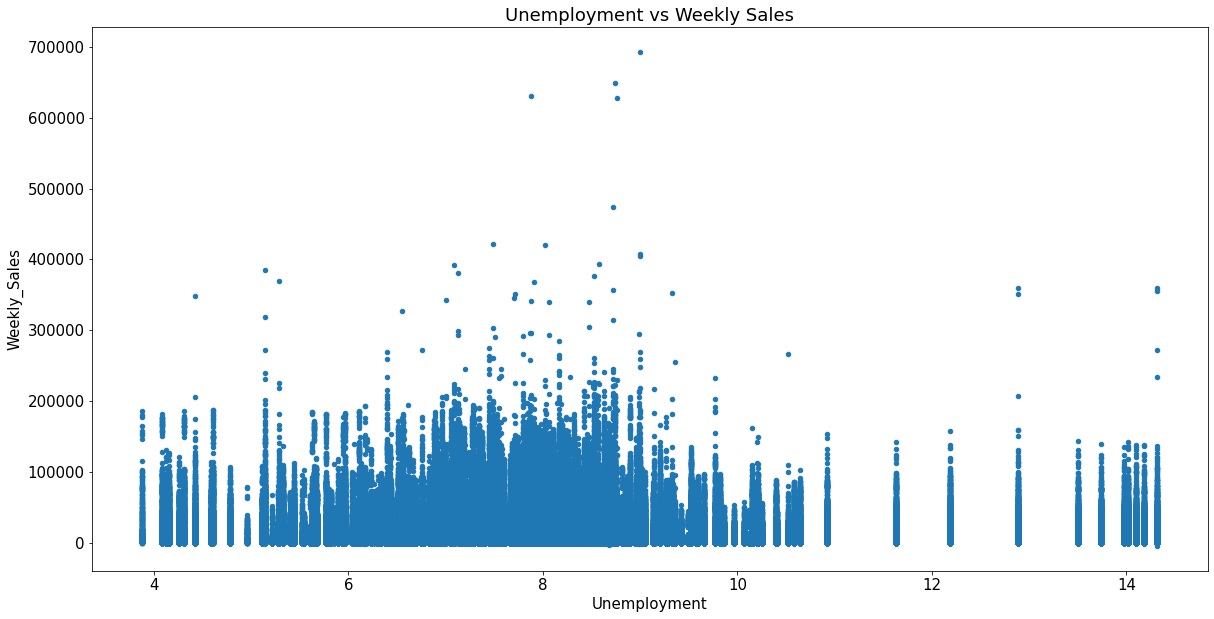

In [ ]:
df.plot(kind = "scatter", x = "Unemployment", y = "Weekly_Sales", title = "Unemployment vs Weekly Sales")

En la siguiente gráfica de barras vemos la cantidad de ventas que se hicieron tanto en tipo ordinario, como en temporada festiva. Vemos una gran diferencia en las ventas realizadas en tiempo ordinario a la cantidad realizada en las épocas festivas.

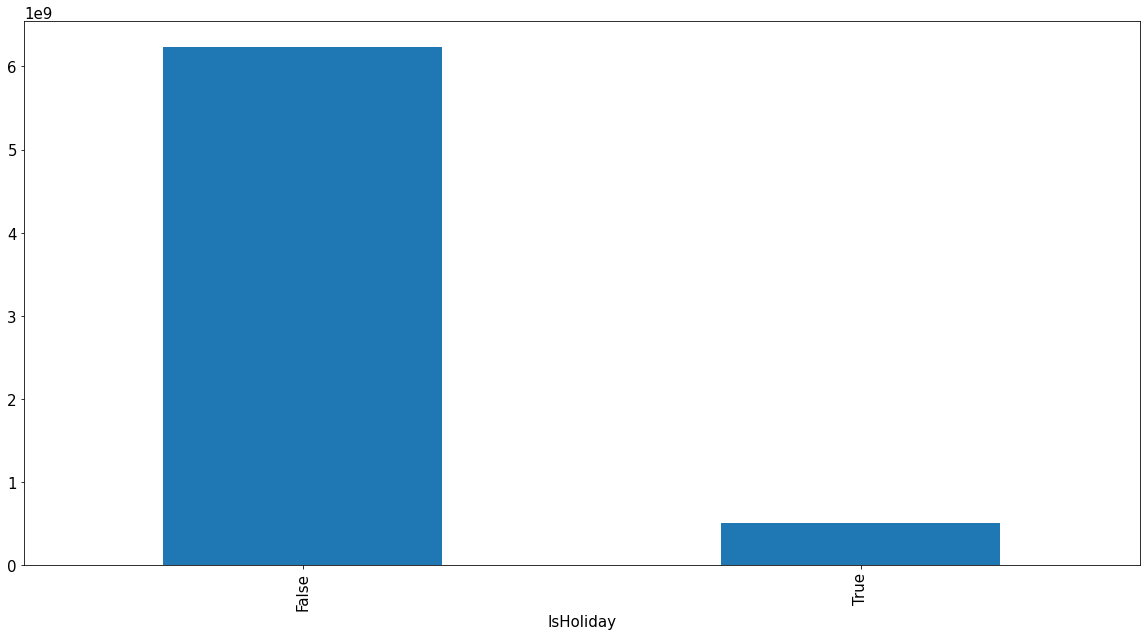

In [ ]:
plot = df.groupby(by = "IsHoliday").sum().Weekly_Sales
#plot["Festivo"] = plot.index.values
#plot.plot(x='Festivo', y='Weekly_Sales', kind='bar')
plot.plot.bar()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce").dt.date
df["Mes"] = df["Date"].apply(lambda x:x.month)
df["Mes"] = df["Mes"].apply(lambda x: calendar.month_abbr[x])
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,key,Dept,Weekly_Sales,IsHoliday,Type,Size,Mes
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,1,24924.50,False,A,151315,May
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,2,50605.27,False,A,151315,May
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,3,13740.12,False,A,151315,May
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,4,39954.04,False,A,151315,May
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,5,32229.38,False,A,151315,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,93,2487.80,False,B,118221,Oct
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,94,5203.31,False,B,118221,Oct
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,95,56017.47,False,B,118221,Oct
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,97,6817.48,False,B,118221,Oct


In [ ]:
df["YearMonth"] =  pd.to_datetime(df.Date).dt.to_period("M")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,key,Dept,Weekly_Sales,IsHoliday,Type,Size,Mes,YearMonth
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,1,24924.50,False,A,151315,May,2010-05
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,2,50605.27,False,A,151315,May,2010-05
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,3,13740.12,False,A,151315,May,2010-05
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,4,39954.04,False,A,151315,May,2010-05
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,105/02/2010,5,32229.38,False,A,151315,May,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,93,2487.80,False,B,118221,Oct,2012-10
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,94,5203.31,False,B,118221,Oct,2012-10
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,95,56017.47,False,B,118221,Oct,2012-10
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4526/10/2012,97,6817.48,False,B,118221,Oct,2012-10


(ESTACIONALIDAD)Con esta gráfica se muestra el cambio que hay en las ventas semanales a lo largo de los años. 

In [ ]:
dfplot = df.groupby(by="YearMonth").Weekly_Sales.sum()
dfplot = pd.DataFrame(dfplot)

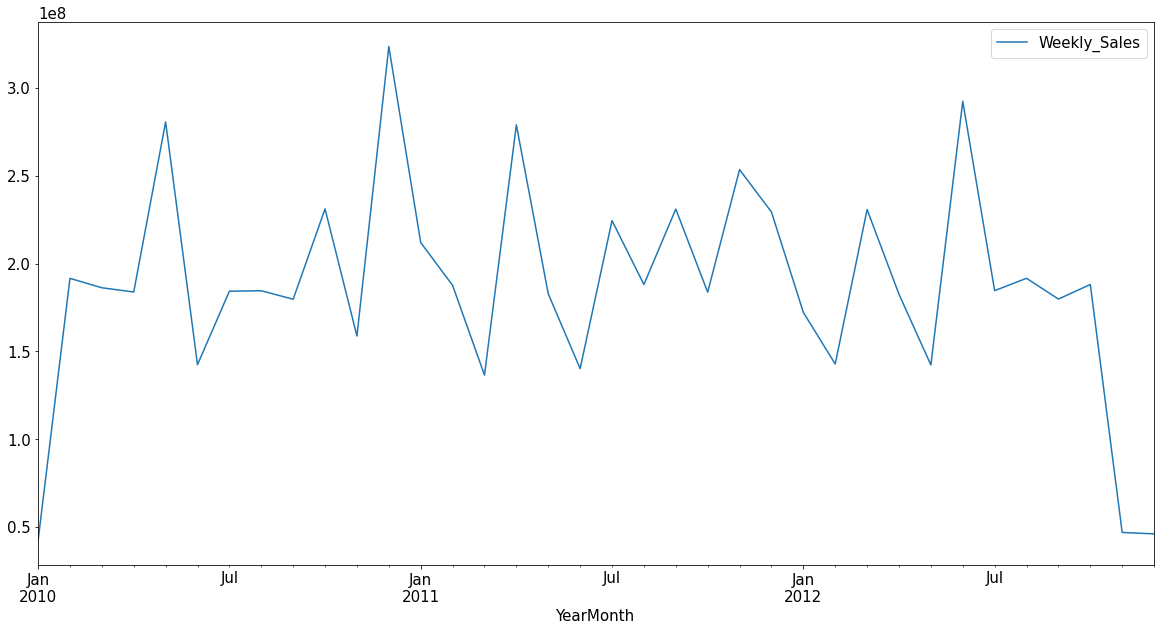

In [ ]:
dfplot.plot.line()

(ESTACIONALIDAD)Con la gráfica inferior, mostramos el cambio en el precio de la energía a lo largo de los años. 

In [ ]:
dfplot = df.groupby(by="YearMonth").Fuel_Price.sum()
dfplot = pd.DataFrame(dfplot)

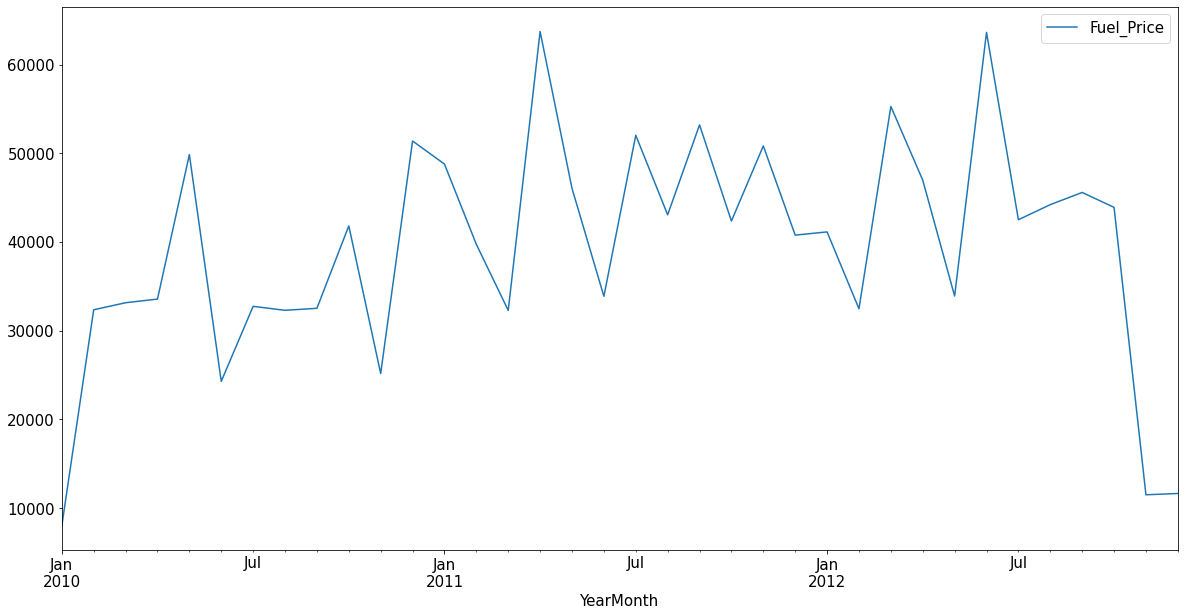

In [ ]:
dfplot.plot.line()

Con esta gráfica que verán a continuación, se muestran cuales son los departamentos que MÁS venden en epoca festiva. 

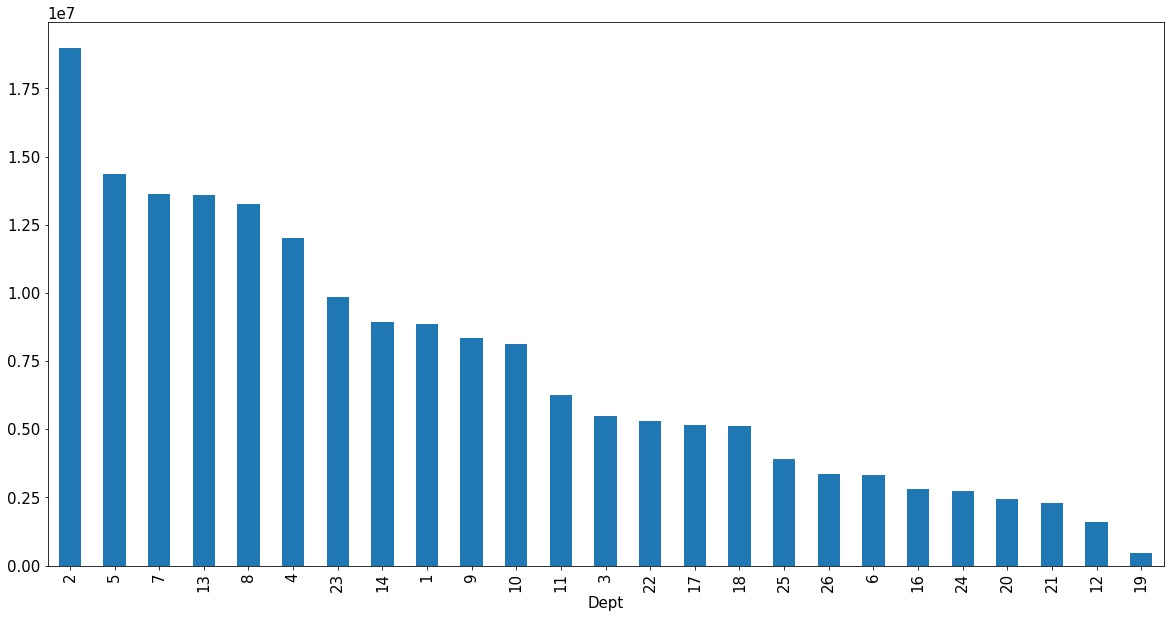

In [ ]:
#los top 25 departamentos que mas venden en holidays
dfholiday = df[df["IsHoliday"] == True]
dfholiday
dfholiday.groupby(by = "Dept").Weekly_Sales.sum().head(25).sort_values( ascending = False).plot.bar()



Y con esta otra gráfica se muestra cuales son los departamentos que MÁS venden en epoca ordinaria, es decir, NO festiva. 

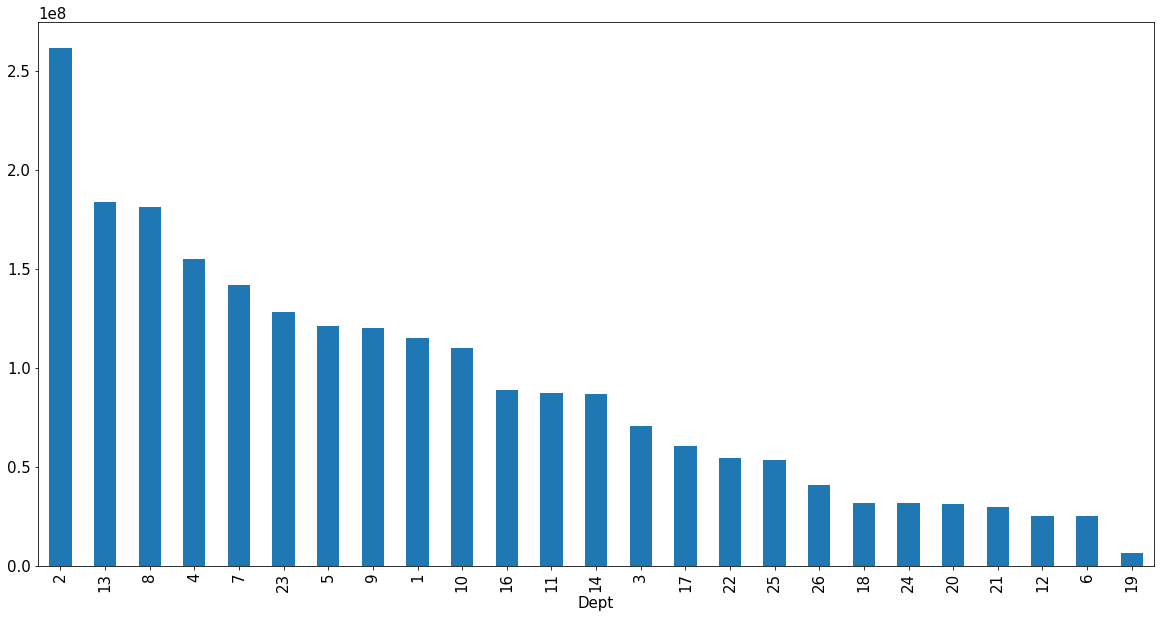

In [ ]:
#los top 25 departamentos que mas venden en donde no son holidays
dfholiday = df[df["IsHoliday"] == False]
dfholiday
dfholiday.groupby(by = "Dept").Weekly_Sales.sum().head(25).sort_values( ascending = False).plot.bar()

A continuación veremos el MIX de las ventas de las TOP 3 tiendas con mayores ventas, que son la 20, la 4 y la 14.
Con esto queremos ver que porcentaje de las ventas pertenecen a cada departamento. 

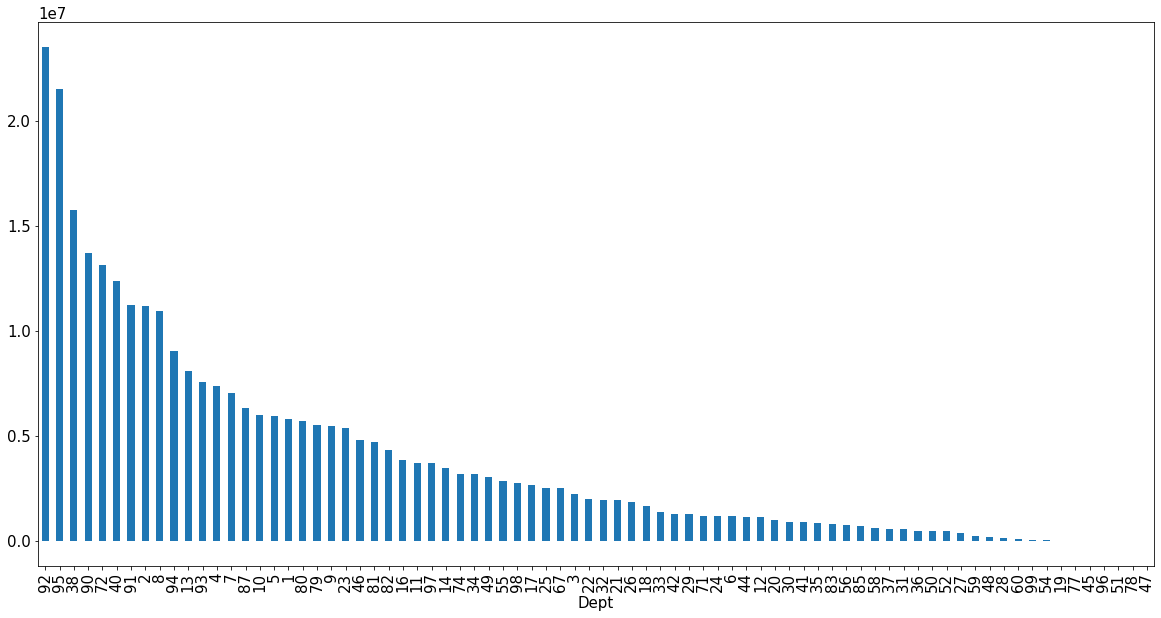

In [ ]:
#tienda 20
tienda20 = df[df["Store"] == 20]
tienda20 = tienda20.groupby(by = "Dept").sum().Weekly_Sales
tienda20.sort_values( ascending = False).plot.bar()

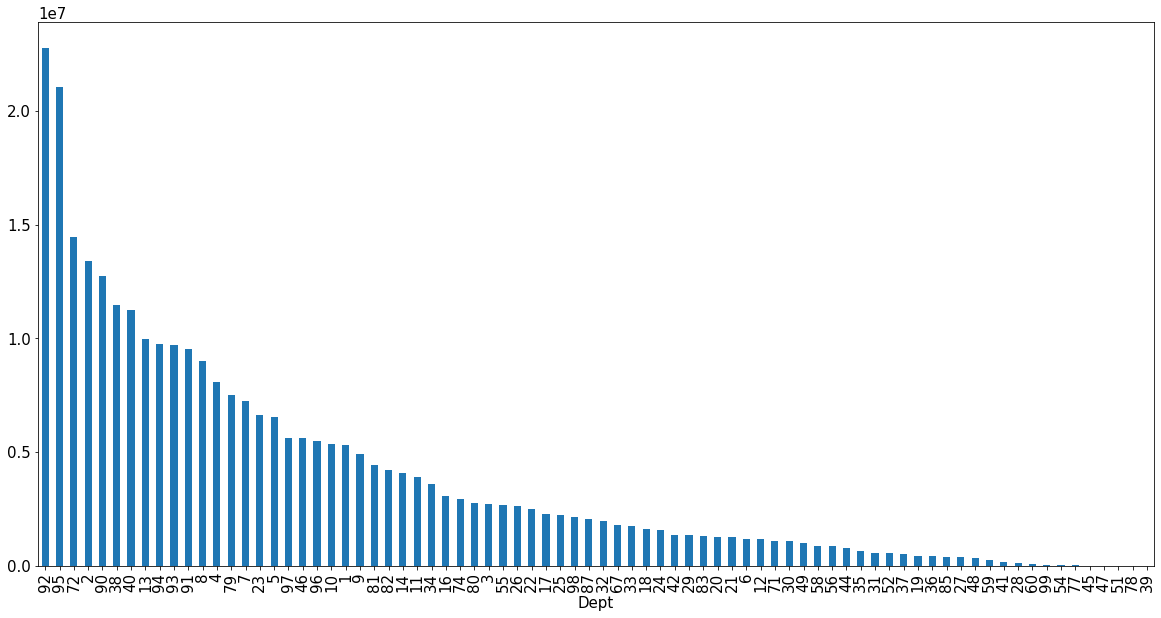

In [ ]:
#TIENDA 4
tienda4 = df[df["Store"] == 4]
tienda4 = tienda4.groupby(by = "Dept").sum().Weekly_Sales
tienda4.sort_values( ascending = False).plot.bar()

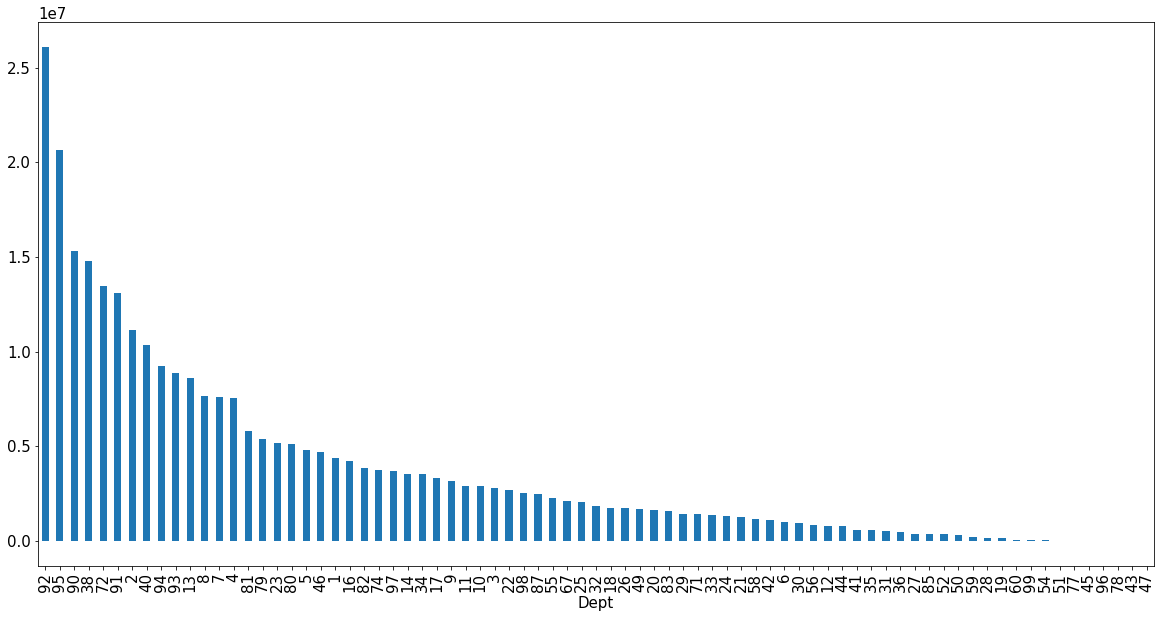

In [ ]:
#TIENDA 14
tienda14 = df[df["Store"] == 14]
tienda14 = tienda14.groupby(by = "Dept").sum().Weekly_Sales
tienda14.sort_values( ascending = False).plot.bar()